# **기름이 detection**

In [81]:
# load necessary modules
from transformers import YolosImageProcessor, YolosForObjectDetection,DetrImageProcessor,DetrForObjectDetection
import torch
from PIL import Image, ImageDraw

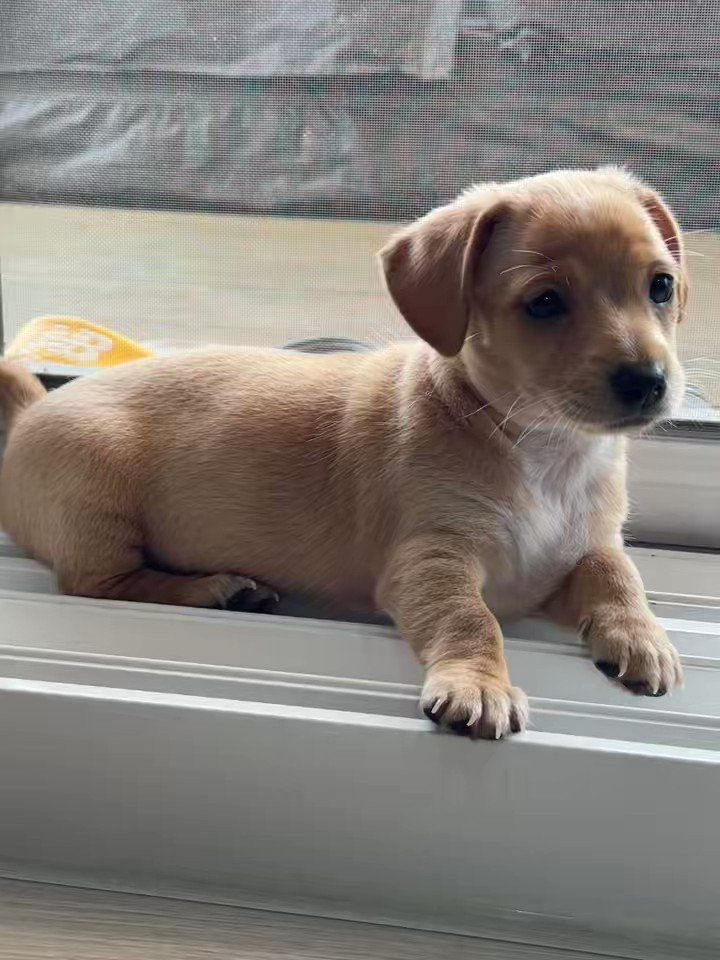

In [82]:
# load & show image
gireumee = '/39a38e7232447bd66f377feb10405271.jpg'
gireumee = Image.open(gireumee)
gireumee

##1. facebook/detr-resnet-101

In [83]:
# MODEL1: facebook/detr-resnet-101
model1_path = 'facebook/detr-resnet-101'
processor1 = DetrImageProcessor.from_pretrained(model1_path, revision="no_timm")
model1 = DetrForObjectDetection.from_pretrained(model1_path, revision="no_timm")

In [84]:
#convert image to tensors by image processor
inputs1 = processor1(images=gireumee, return_tensors="pt")
inputs1

{'pixel_values': tensor([[[[-0.1828,  0.1768, -0.1999,  ...,  0.4166,  0.0227,  0.0569],
          [-0.1486,  0.3823,  0.0398,  ...,  0.0741, -0.9877, -0.2513],
          [-0.3712,  0.1426, -0.1999,  ...,  0.1597, -0.3369, -0.0116],
          ...,
          [ 0.7591,  0.7591,  0.7591,  ..., -0.5767, -0.5767, -0.5767],
          [ 0.5364,  0.5364,  0.5364,  ..., -0.5253, -0.5253, -0.5253],
          [ 0.5878,  0.5878,  0.5707,  ..., -0.5082, -0.4911, -0.4739]],

         [[ 0.0126,  0.3803, -0.0049,  ...,  0.5378,  0.1352,  0.1702],
          [ 0.0476,  0.5903,  0.2402,  ...,  0.1877, -0.8978, -0.1450],
          [-0.1800,  0.3452, -0.0049,  ...,  0.2752, -0.2325,  0.1001],
          ...,
          [ 0.6954,  0.6954,  0.6954,  ..., -0.3725, -0.3725, -0.3725],
          [ 0.4678,  0.4678,  0.4678,  ..., -0.3200, -0.3200, -0.3200],
          [ 0.5203,  0.5203,  0.5028,  ..., -0.3025, -0.2850, -0.2675]],

         [[ 0.2871,  0.6531,  0.2696,  ...,  0.8448,  0.4439,  0.4788],
          [ 0

In [85]:
# run model
outputs1 = model1(**inputs1)

In [86]:
# resize result
target_sizes = torch.tensor([gireumee.size[::-1]])
results1 = processor1.post_process_object_detection(outputs1, target_sizes=target_sizes, threshold=0.9)[0]

In [87]:
result1 = gireumee.copy()
draw = ImageDraw.Draw(result1)

In [88]:
# draw a result box & print result
for score, label, box in zip(results1["scores"], results1["labels"], results1["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_str = model1.config.id2label[label.item()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]), f"Detected {label_str} with confidence {round(score.item(), 3)} at location {box}", fill="red")

In [89]:
# print score and label
print(model1.config.id2label[label.item()])
print(score.item())

dog
0.999508261680603


In [90]:
# save result
result1.save("/gireumee1.jpg")

##2. hustvl/yolos-tiny

In [91]:
# MODEL2: hustvl/yolos-tiny
model2_path = 'hustvl/yolos-tiny'
processor2 = YolosImageProcessor.from_pretrained(model2_path)
model2 = YolosForObjectDetection.from_pretrained(model2_path)

In [92]:
#convert image to tensors by image processor
inputs2 = processor2(images=gireumee, return_tensors="pt")
inputs2

{'pixel_values': tensor([[[[-0.0116,  0.0227,  0.0398,  ...,  0.1939,  0.1083, -0.1828],
          [-0.1143, -0.0287, -0.0972,  ..., -0.0458, -0.0629, -0.2684],
          [ 0.0912, -0.0972, -0.0287,  ...,  0.0741,  0.0912,  0.0056],
          ...,
          [ 0.8276,  0.8276,  0.8276,  ..., -0.6281, -0.6281, -0.6452],
          [ 0.7077,  0.7077,  0.7077,  ..., -0.5596, -0.5596, -0.5596],
          [ 0.5707,  0.5536,  0.5536,  ..., -0.5253, -0.5082, -0.4911]],

         [[ 0.1877,  0.2227,  0.2402,  ...,  0.3102,  0.2227, -0.0749],
          [ 0.0826,  0.1702,  0.1001,  ...,  0.0651,  0.0476, -0.1625],
          [ 0.2927,  0.1001,  0.1702,  ...,  0.1877,  0.2052,  0.1176],
          ...,
          [ 0.7654,  0.7654,  0.7654,  ..., -0.4251, -0.4251, -0.4426],
          [ 0.6429,  0.6429,  0.6429,  ..., -0.3550, -0.3550, -0.3550],
          [ 0.5028,  0.4853,  0.4853,  ..., -0.3200, -0.3025, -0.2850]],

         [[ 0.4614,  0.4962,  0.5136,  ...,  0.6182,  0.5311,  0.2348],
          [ 0

In [93]:
# run model
outputs2 = model2(**inputs2)

In [103]:
# resize result
target_sizes = torch.tensor([gireumee.size[::-1]])
results2 = processor2.post_process_object_detection(outputs2, target_sizes=target_sizes, threshold=0.9)[0]

In [104]:
result2 = gireumee.copy()
draw = ImageDraw.Draw(result2)

In [105]:
# draw a result box & print result
for score, label, box in zip(results2["scores"], results2["labels"], results2["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_str = model2.config.id2label[label.item()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]), f"Detected {label_str} with confidence {round(score.item(), 3)} at location {box}", fill="red")

In [106]:
# print score and label
print(model2.config.id2label[label.item()])
print(score.item())

dog
0.9931093454360962


In [107]:
# save result
result1.save("/gireumee2.jpg")

##3. 결과 비교 : 두 모델 모두 정확!

In [108]:
#image processed by MODEL1
gireumee1 = '/gireumee1.jpg'
gireumee1 = Image.open(gireumee1)

In [109]:
#image processed by MODEL2
gireumee2 = '/gireumee2.jpg'
gireumee2 = Image.open(gireumee2)

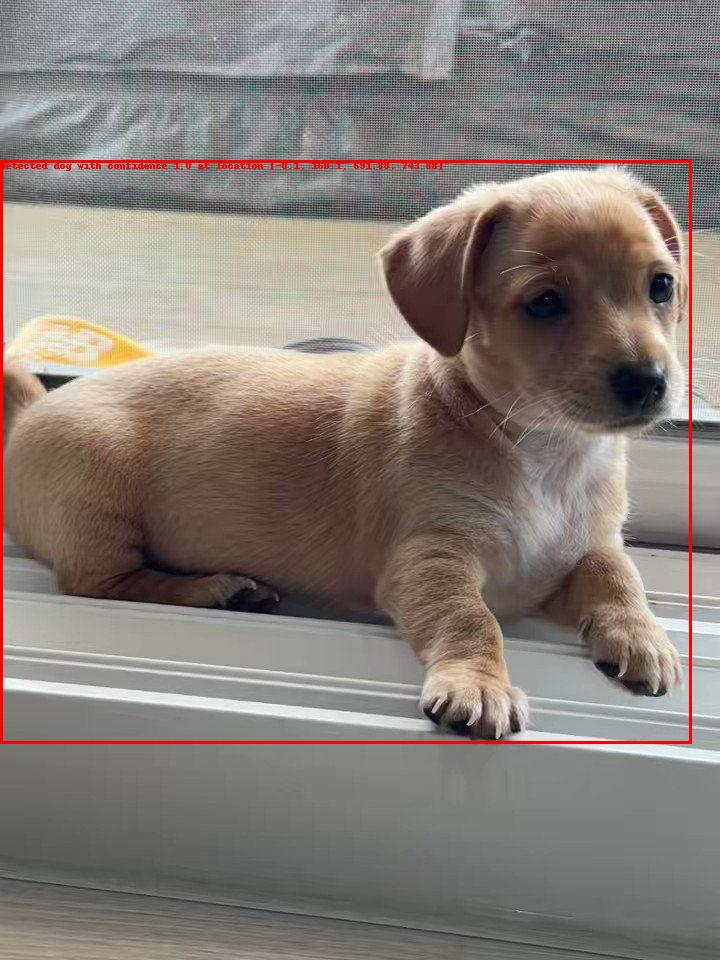

In [110]:
gireumee1

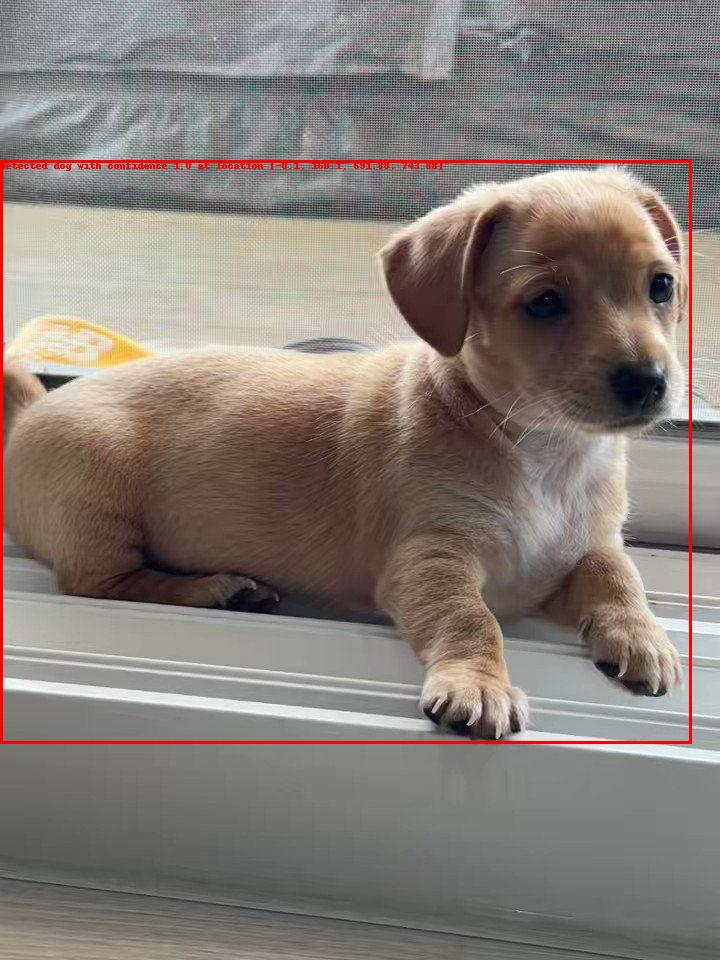

In [111]:
gireumee2